# Предсказание прогрессии диабета 🏥

## Введение

В этом ноутбуке мы познакомимся с задачей **регрессии** - одной из основных задач машинного обучения. Регрессия - это предсказание непрерывного числового значения.

**Наша задача:** по медицинским показателям пациента предсказать количественный показатель прогрессии диабета через год после начальных измерений.

**Методы, которые мы изучим:**
- Линейная регрессия (Linear Regression)
- K-ближайших соседей для регрессии (KNN Regression)


## 1. Импорт библиотек


In [1]:
# Библиотеки для работы с данными
import pandas as pd
import numpy as np

# Библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

# Библиотека для машинного обучения
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Настройка стиля графиков
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline


## 2. Загрузка данных

Датасет Diabetes содержит информацию о 442 пациентах с диабетом. Для каждого пациента измерено 10 признаков:

1. **age** - возраст
2. **sex** - пол
3. **bmi** - индекс массы тела (body mass index)
4. **bp** - среднее артериальное давление (blood pressure)
5. **s1** - общий холестерин в сыворотке
6. **s2** - липопротеины низкой плотности
7. **s3** - липопротеины высокой плотности
8. **s4** - общий холестерин / HDL
9. **s5** - логарифм триглицеридов
10. **s6** - уровень сахара в крови

**Целевая переменная:** количественная мера прогрессии диабета через год после начальных измерений.


In [2]:
# Загружаем датасет
diabetes = load_diabetes()

# Создаем DataFrame для удобства работы
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

# Посмотрим на первые строки
print("Первые 5 строк датасета:")
print(df.head())
print(f"\nРазмер датасета: {df.shape[0]} пациентов, {df.shape[1]-1} признаков")


Первые 5 строк датасета:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  

Размер датасета: 442 пациентов, 10 признаков


In [3]:
# Базовая статистика
print("Статистика по признакам и целевой переменной:")
print(df.describe())

print("\n⚠️ Внимание: признаки в этом датасете уже нормализованы (среднее=0, стандартное отклонение≈0.05)")


Статистика по признакам и целевой переменной:
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std  

## 3. Визуализация данных


Визуализация поможет нам понять распределение данных и связи между признаками и целевой переменной.

### 3.1 Распределение целевой переменной

Посмотрим, как распределены значения прогрессии диабета:


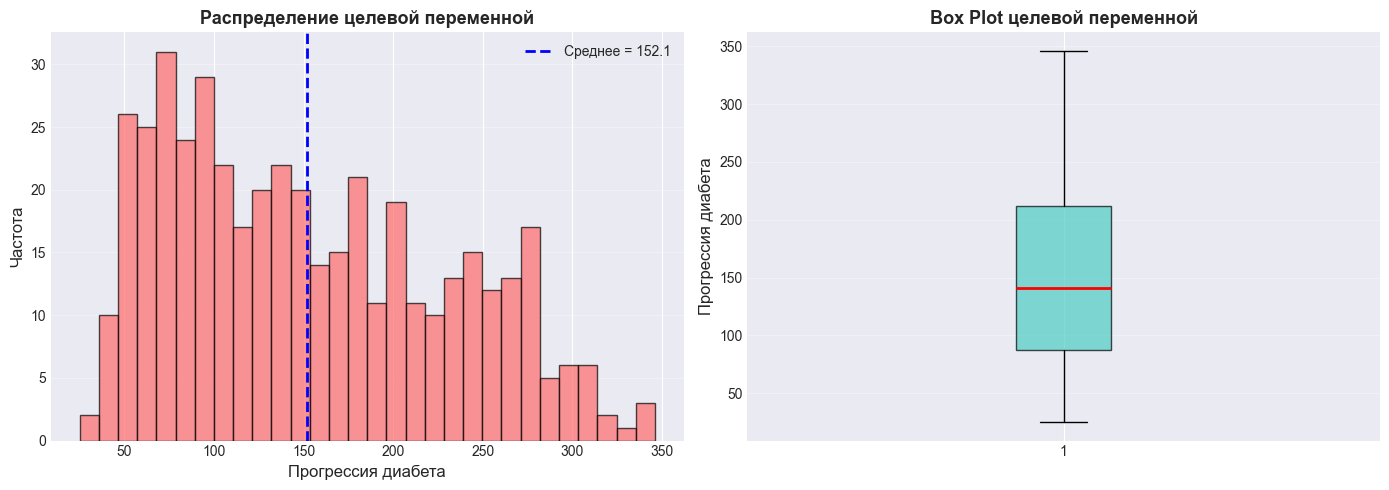

Минимум: 25.0
Максимум: 346.0
Среднее: 152.1
Медиана: 140.5


In [4]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Гистограмма
axes[0].hist(df['target'], bins=30, color='#FF6B6B', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Прогрессия диабета', fontsize=12)
axes[0].set_ylabel('Частота', fontsize=12)
axes[0].set_title('Распределение целевой переменной', fontsize=13, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)
axes[0].axvline(df['target'].mean(), color='blue', linestyle='--', linewidth=2, label=f'Среднее = {df["target"].mean():.1f}')
axes[0].legend()

# Box plot
axes[1].boxplot(df['target'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='#4ECDC4', alpha=0.7),
                medianprops=dict(color='red', linewidth=2))
axes[1].set_ylabel('Прогрессия диабета', fontsize=12)
axes[1].set_title('Box Plot целевой переменной', fontsize=13, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Минимум: {df['target'].min():.1f}")
print(f"Максимум: {df['target'].max():.1f}")
print(f"Среднее: {df['target'].mean():.1f}")
print(f"Медиана: {df['target'].median():.1f}")


### 3.2 Зависимость целевой переменной от признаков

Scatter plots помогут увидеть, какие признаки наиболее связаны с прогрессией диабета:


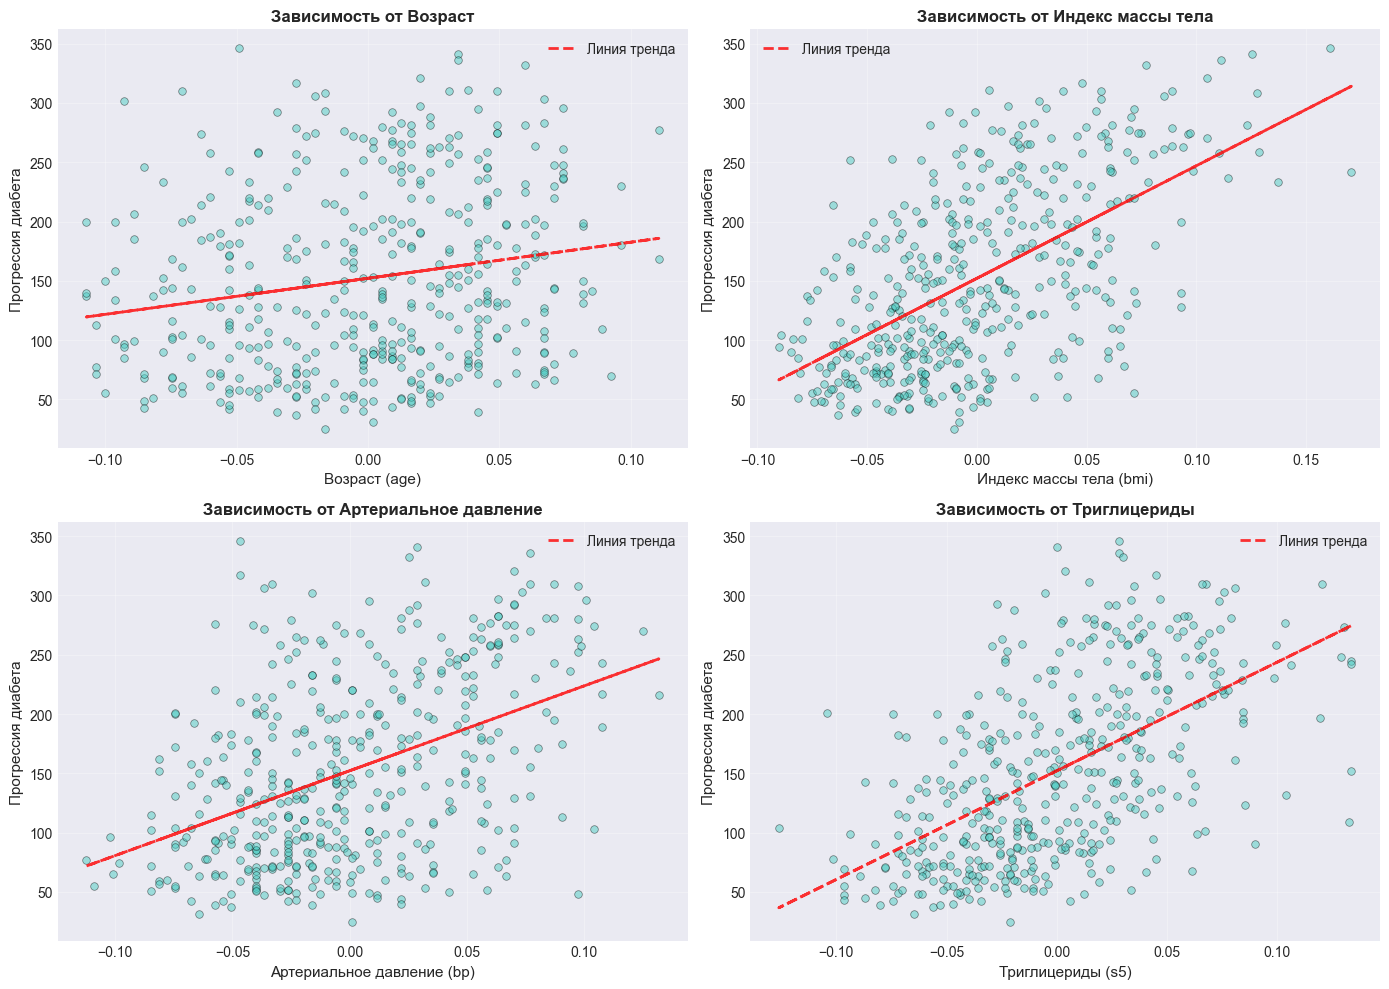

In [5]:
# Выбираем наиболее интересные признаки для визуализации
features_to_plot = ['age', 'bmi', 'bp', 's5']
feature_names_ru = ['Возраст', 'Индекс массы тела', 'Артериальное давление', 'Триглицериды']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for idx, (feature, feature_ru) in enumerate(zip(features_to_plot, feature_names_ru)):
    ax = axes[idx // 2, idx % 2]
    ax.scatter(df[feature], df['target'], alpha=0.5, s=30, color='#4ECDC4', edgecolors='black', linewidth=0.5)
    ax.set_xlabel(f'{feature_ru} ({feature})', fontsize=11)
    ax.set_ylabel('Прогрессия диабета', fontsize=11)
    ax.set_title(f'Зависимость от {feature_ru}', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)
    
    # Добавляем линию тренда
    z = np.polyfit(df[feature], df['target'], 1)
    p = np.poly1d(z)
    ax.plot(df[feature], p(df[feature]), "r--", alpha=0.8, linewidth=2, label='Линия тренда')
    ax.legend()

plt.tight_layout()
plt.show()


### 3.3 Корреляционная матрица

Корреляция показывает силу линейной связи между признаками и целевой переменной:


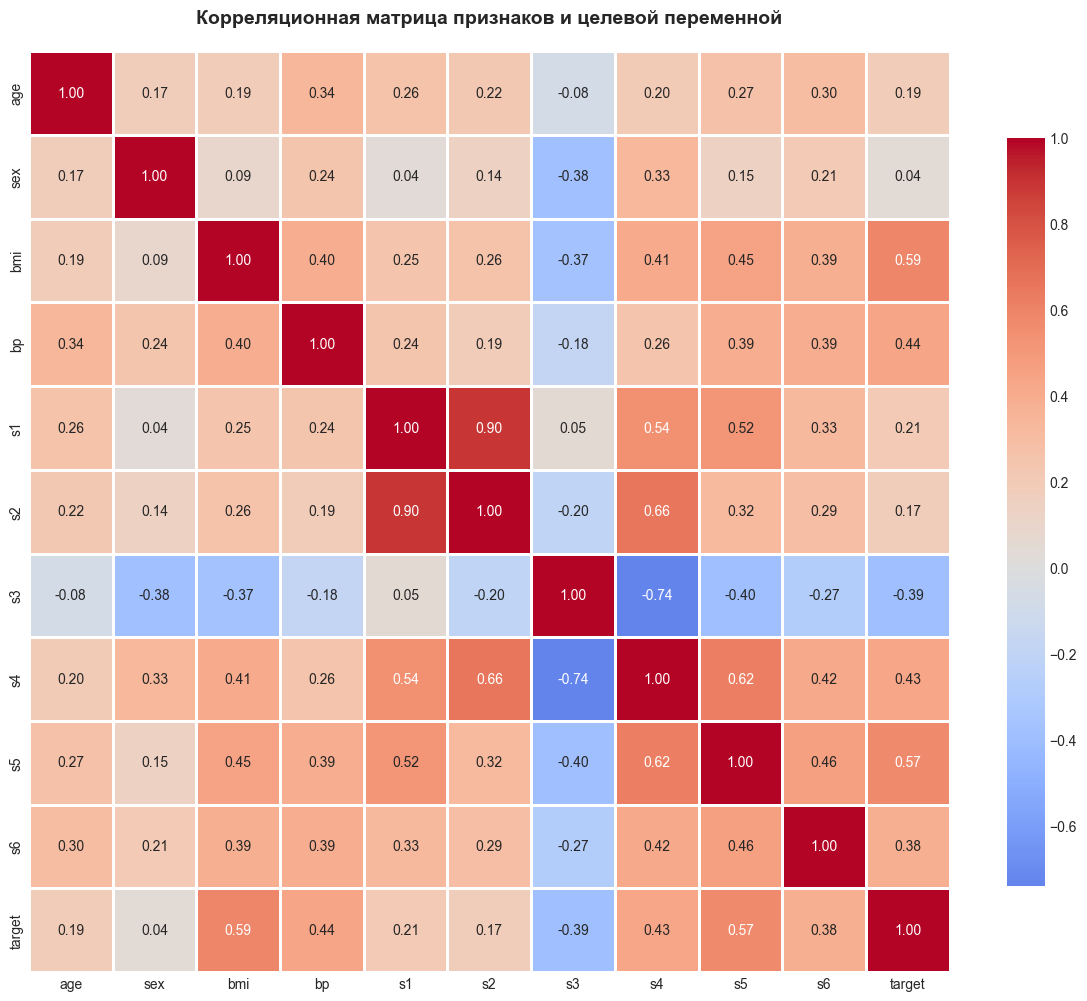


Корреляция признаков с целевой переменной (от большей к меньшей):
bmi  : +0.586
s5   : +0.566
bp   : +0.441
s4   : +0.430
s6   : +0.382
s1   : +0.212
age  : +0.188
s2   : +0.174
sex  : +0.043
s3   : -0.395


In [6]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, fmt='.2f')
plt.title('Корреляционная матрица признаков и целевой переменной', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Корреляция с целевой переменной
print("\nКорреляция признаков с целевой переменной (от большей к меньшей):")
target_corr = correlation_matrix['target'].drop('target').sort_values(ascending=False)
for feature, corr in target_corr.items():
    print(f"{feature:5s}: {corr:+.3f}")


## 4. Подготовка данных для обучения


Разделим данные на обучающую и тестовую выборки:

In [7]:
# Выделяем признаки (X) и целевую переменную (y)
X = diabetes.data  # Признаки: медицинские показатели
y = diabetes.target  # Целевая переменная: прогрессия диабета

# Разделяем данные: 70% на обучение, 30% на тест
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Размер обучающей выборки: {X_train.shape[0]} пациентов")
print(f"Размер тестовой выборки: {X_test.shape[0]} пациентов")
print(f"Количество признаков: {X_train.shape[1]}")


Размер обучающей выборки: 309 пациентов
Размер тестовой выборки: 133 пациентов
Количество признаков: 10


## 5. Линейная регрессия

### Как работает линейная регрессия?

Линейная регрессия - это один из самых простых и популярных методов машинного обучения. Идея:
1. Предполагаем, что целевая переменная **линейно зависит** от признаков
2. Находим коэффициенты (веса), которые минимизируют ошибку предсказания
3. Используем найденные коэффициенты для предсказания новых значений

### Математика линейной регрессии

**Модель линейной регрессии:**

$$
\hat{y} = w_0 + w_1 x_1 + w_2 x_2 + \ldots + w_n x_n = w_0 + \sum_{i=1}^{n} w_i x_i
$$

где:
- $ \hat{y} $ - предсказанное значение целевой переменной
- $ x_i $ - значения признаков
- $ w_i $ - веса (коэффициенты) модели
- $ w_0 $ - свободный член (intercept, bias)

**Функция ошибки (Mean Squared Error - MSE):**

$$
\text{MSE} = \frac{1}{m} \sum_{j=1}^{m} (y_j - \hat{y}_j)^2
$$

где $ m $ - количество объектов в выборке, $ y_j $ - истинное значение, $ \hat{y}_j $ - предсказанное значение.

**Цель обучения:** найти веса $ w_0, w_1, \ldots, w_n $, которые минимизируют MSE.

### Метод наименьших квадратов

Для простой линейной регрессии (один признак) веса можно найти аналитически:

$$
w_1 = \frac{\sum_{i=1}^{m} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{m} (x_i - \bar{x})^2}, \quad w_0 = \bar{y} - w_1 \bar{x}
$$

где $ \bar{x} $ и $ \bar{y} $ - средние значения.

Для многомерного случая используется **матричная форма** или **градиентный спуск**.


### Градиентный спуск (интуиция)

**Градиентный спуск** - это итеративный метод поиска минимума функции ошибки:

1. Начинаем с случайных весов
2. Вычисляем ошибку (насколько плохо предсказываем)
3. Двигаемся в направлении уменьшения ошибки (градиент)
4. Повторяем до сходимости

**Формула обновления весов:**

$$
w_i := w_i - \alpha \frac{\partial \text{MSE}}{\partial w_i}
$$

где $ \alpha $ - скорость обучения (learning rate), определяет размер шага.


### Обучение и тестирование линейной регрессии


<div style="text-align:center">
    <img src="figures/gradient-descent.gif" width="500"/>
</div>

In [8]:
# Создаем модель линейной регрессии
lr = LinearRegression()

# Обучаем модель на обучающей выборке
lr.fit(X_train, y_train)

# Делаем предсказания на тестовой выборке
y_pred = lr.predict(X_test)

# Оцениваем качество модели
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📊 Метрики качества модели:")
print(f"MSE (Mean Squared Error): {mse:.2f}")
print(f"RMSE (Root MSE): {rmse:.2f}")
print(f"MAE (Mean Absolute Error): {mae:.2f}")
print(f"R² (коэффициент детерминации): {r2:.3f}")
print(f"\nИнтерпретация R²: модель объясняет {r2*100:.1f}% вариации целевой переменной")


📊 Метрики качества модели:
MSE (Mean Squared Error): 2821.75
RMSE (Root MSE): 53.12
MAE (Mean Absolute Error): 41.92
R² (коэффициент детерминации): 0.477

Интерпретация R²: модель объясняет 47.7% вариации целевой переменной


### Метрики регрессии - что они означают?

**MSE (Mean Squared Error)** - средняя квадратичная ошибка:
$$
\text{MSE} = \frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2
$$
Чем меньше, тем лучше. Штрафует большие ошибки сильнее.

**RMSE (Root Mean Squared Error)** - корень из MSE:
$$
\text{RMSE} = \sqrt{\text{MSE}}
$$
Имеет ту же размерность, что и целевая переменная.

**MAE (Mean Absolute Error)** - средняя абсолютная ошибка:
$$
\text{MAE} = \frac{1}{m} \sum_{i=1}^{m} |y_i - \hat{y}_i|
$$
Среднее отклонение предсказания от истинного значения.

**R² (коэффициент детерминации)** - доля объясненной дисперсии:
$$
R^2 = 1 - \frac{\sum_{i=1}^{m} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{m} (y_i - \bar{y})^2}
$$
Значения от 0 до 1 (иногда может быть отрицательным). 1 = идеальная модель, 0 = модель не лучше предсказания среднего.


## 6. Визуализация результатов


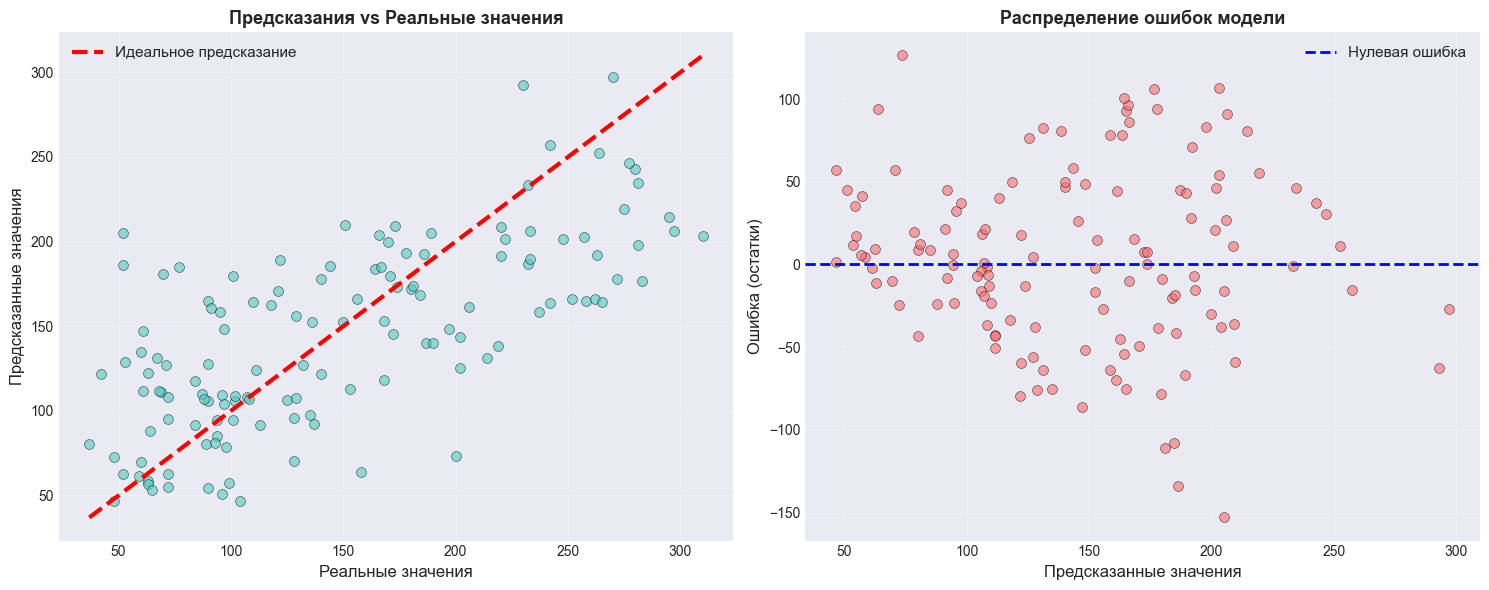

💡 Интерпретация графиков:
1. Точки близко к красной линии = хорошие предсказания
2. Равномерное распределение ошибок вокруг нуля = модель не имеет систематического смещения


In [9]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# График 1: Предсказанные vs Реальные значения
axes[0].scatter(y_test, y_pred, alpha=0.6, s=50, color='#4ECDC4', edgecolors='black', linewidth=0.5)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
             'r--', lw=3, label='Идеальное предсказание')
axes[0].set_xlabel('Реальные значения', fontsize=12)
axes[0].set_ylabel('Предсказанные значения', fontsize=12)
axes[0].set_title('Предсказания vs Реальные значения', fontsize=13, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# График 2: Распределение ошибок (residuals)
residuals = y_test - y_pred
axes[1].scatter(y_pred, residuals, alpha=0.6, s=50, color='#FF6B6B', edgecolors='black', linewidth=0.5)
axes[1].axhline(y=0, color='blue', linestyle='--', linewidth=2, label='Нулевая ошибка')
axes[1].set_xlabel('Предсказанные значения', fontsize=12)
axes[1].set_ylabel('Ошибка (остатки)', fontsize=12)
axes[1].set_title('Распределение ошибок модели', fontsize=13, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("💡 Интерпретация графиков:")
print("1. Точки близко к красной линии = хорошие предсказания")
print("2. Равномерное распределение ошибок вокруг нуля = модель не имеет систематического смещения")


### Важность признаков

Посмотрим, какие признаки больше всего влияют на предсказание (по абсолютному значению коэффициентов):


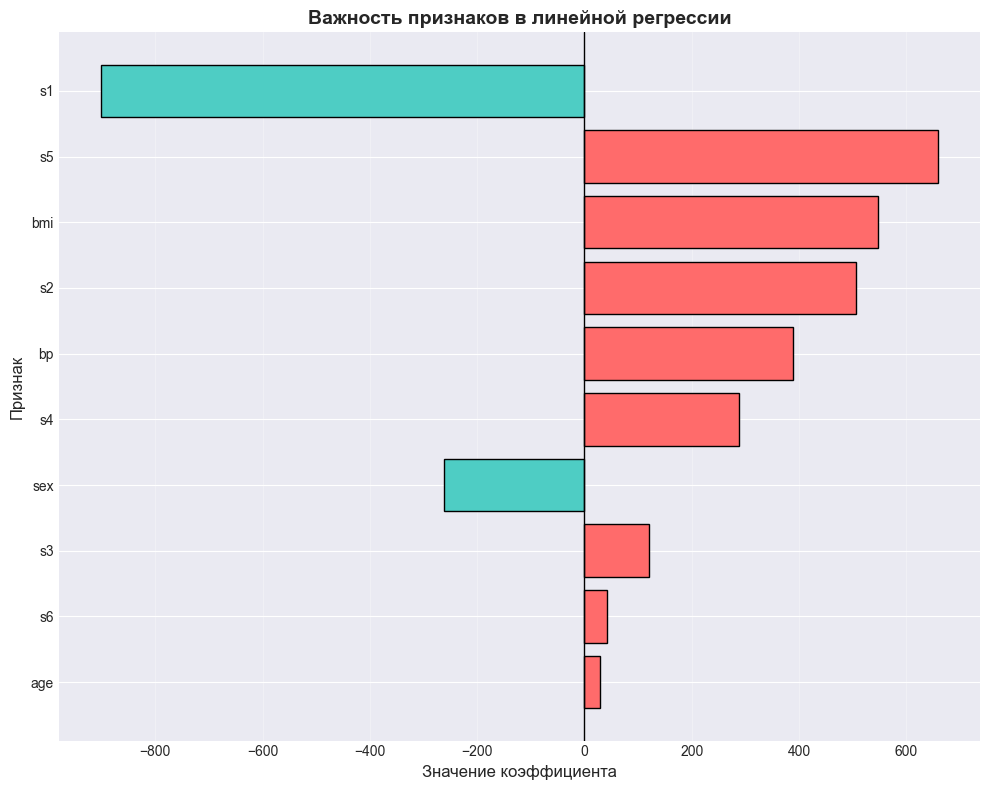


Свободный член (intercept): 151.01

Коэффициенты модели (от большего к меньшему влиянию):
s1   : -901.96
s5   : +659.27
bmi  : +546.30
s2   : +506.76
bp   : +388.40
s4   : +288.04
sex  : -261.71
s3   : +121.15
s6   :  +41.38
age  :  +29.25


In [10]:
# Получаем коэффициенты модели
coefficients = pd.DataFrame({
    'Признак': diabetes.feature_names,
    'Коэффициент': lr.coef_
})
coefficients['Абсолютное значение'] = np.abs(coefficients['Коэффициент'])
coefficients = coefficients.sort_values('Абсолютное значение', ascending=True)

# Визуализация
plt.figure(figsize=(10, 8))
colors = ['#FF6B6B' if x > 0 else '#4ECDC4' for x in coefficients['Коэффициент']]
plt.barh(coefficients['Признак'], coefficients['Коэффициент'], color=colors, edgecolor='black', linewidth=1)
plt.xlabel('Значение коэффициента', fontsize=12)
plt.ylabel('Признак', fontsize=12)
plt.title('Важность признаков в линейной регрессии', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=1)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nСвободный член (intercept): {lr.intercept_:.2f}")
print("\nКоэффициенты модели (от большего к меньшему влиянию):")
for idx, row in coefficients.sort_values('Абсолютное значение', ascending=False).iterrows():
    print(f"{row['Признак']:5s}: {row['Коэффициент']:+7.2f}")


## 7. K-ближайших соседей для регрессии (KNN Regression)


До этого мы использовали линейную регрессию, которая предполагает линейную зависимость между признаками и целевой переменной. Теперь познакомимся с **методом K-ближайших соседей (KNN)**, который может улавливать более сложные, нелинейные зависимости.

### 7.1 Как работает KNN для регрессии?

**Идея метода очень простая:**

Для предсказания значения нового объекта:
1. Находим K самых **похожих** (ближайших) объектов из обучающей выборки
2. Берем **среднее значение** их целевой переменной
3. Это среднее и будет предсказанием

<div style="text-align:center">
    <img src="figures/knn-regression.png" width="500"/>
</div>

**Математически:**

$$\hat{y} = \frac{1}{K} \sum_{i=1}^{K} y_i$$

где $y_i$ - значения целевой переменной K ближайших соседей.

**Расстояние между объектами** обычно измеряется **евклидовой метрикой**:

$$d(x, x') = \sqrt{\sum_{j=1}^{n} (x_j - x'_j)^2}$$

где $x$ и $x'$ - два объекта, $n$ - количество признаков.


**Пример:**

Представьте, что у нас есть данные о росте и весе людей, и мы хотим предсказать вес нового человека ростом 175 см:
- Находим K=3 ближайших соседей: рост 173, 176, 177 см с весом 70, 75, 73 кг
- Предсказание: (70 + 75 + 73) / 3 = 72.67 кг

**Параметр K:**
- **Маленькое K** (например, K=1): модель более чувствительна к шуму, может переобучиться
- **Большое K**: модель более "гладкая", но может упустить детали

### 7.2 Обучение модели KNN


In [12]:
# Создаем модель KNN с K=5
knn = KNeighborsRegressor(n_neighbors=5)

# Обучаем модель
print("🔄 Обучаем KNN...")
knn.fit(X_train, y_train)
print("✅ Модель обучена!")

# Делаем предсказания
y_pred_knn = knn.predict(X_test)

print("\nПример предсказаний KNN (первые 5):")
print(f"Истинные значения: {y_test[:5]}")
print(f"Предсказания KNN:  {y_pred_knn[:5].round(1)}")
print(f"Предсказания LR:   {y_pred[:5].round(1)}")


🔄 Обучаем KNN...
✅ Модель обучена!

Пример предсказаний KNN (первые 5):
Истинные значения: [219.  70. 202. 230. 111.]
Предсказания KNN:  [125.6 160.2 153.  238.  153.4]
Предсказания LR:   [138.5 181.1 125.3 292.8 123.9]


### 7.3 Оценка качества KNN


In [13]:
# Вычисляем метрики для KNN
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("📊 МЕТРИКИ КАЧЕСТВА KNN (K=5)")
print("=" * 60)
print(f"MSE (средняя квадратичная ошибка):  {mse_knn:.2f}")
print(f"RMSE (корень из MSE):                {rmse_knn:.2f}")
print(f"MAE (средняя абсолютная ошибка):     {mae_knn:.2f}")
print(f"R² (коэффициент детерминации):       {r2_knn:.4f}")
print("=" * 60)


📊 МЕТРИКИ КАЧЕСТВА KNN (K=5)
MSE (средняя квадратичная ошибка):  3222.12
RMSE (корень из MSE):                56.76
MAE (средняя абсолютная ошибка):     44.00
R² (коэффициент детерминации):       0.4031


### 7.4 Сравнение Линейной Регрессии и KNN


📊 СРАВНЕНИЕ МОДЕЛЕЙ
Метрика  Линейная регрессия   KNN (K=5)
    MSE         2821.750981 3222.117895
   RMSE           53.120156   56.763702
    MAE           41.919378   44.003008
     R²            0.477290    0.403124


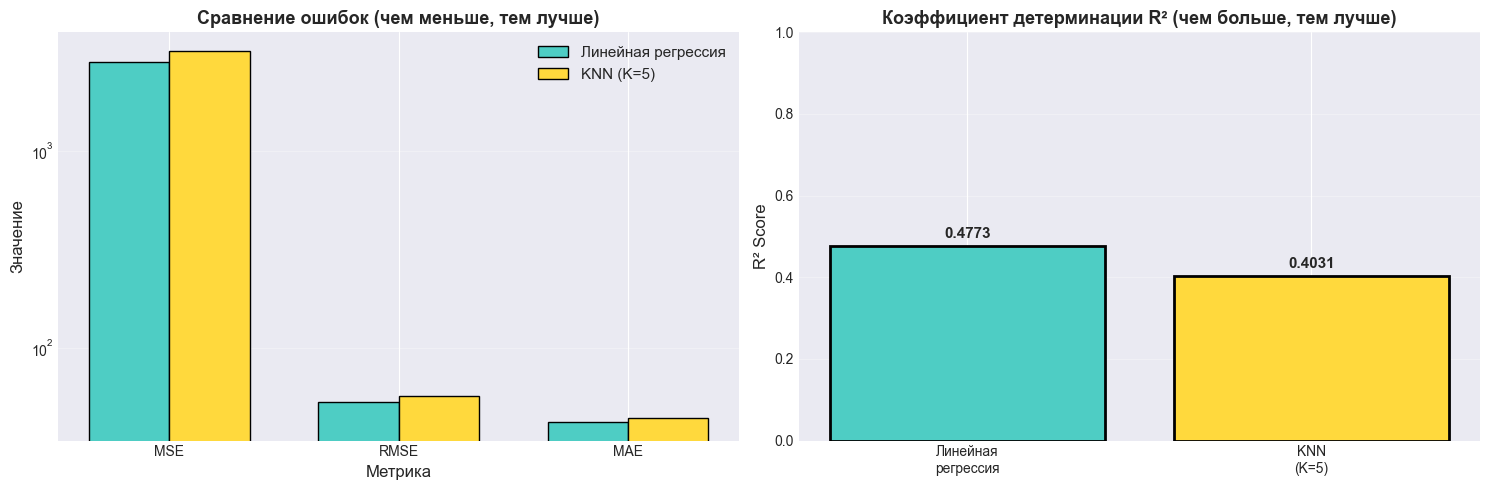


🏆 Линейная регрессия показывает лучший результат (R² = 0.4773 vs 0.4031)


In [16]:
# Создаем сравнительную таблицу
comparison = pd.DataFrame({
    'Метрика': ['MSE', 'RMSE', 'MAE', 'R²'],
    'Линейная регрессия': [mse, rmse, mae, r2],
    'KNN (K=5)': [mse_knn, rmse_knn, mae_knn, r2_knn]
})

print("📊 СРАВНЕНИЕ МОДЕЛЕЙ")
print("=" * 70)
print(comparison.to_string(index=False))
print("=" * 70)

# Визуализация сравнения
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# График 1: Сравнение метрик
metrics_names = ['MSE', 'RMSE', 'MAE']
lr_metrics = [mse, rmse, mae]
knn_metrics = [mse_knn, rmse_knn, mae_knn]

x = np.arange(len(metrics_names))
width = 0.35

axes[0].set_yscale("log")
axes[0].bar(x - width/2, lr_metrics, width, label='Линейная регрессия', color='#4ECDC4', edgecolor='black')
axes[0].bar(x + width/2, knn_metrics, width, label='KNN (K=5)', color='#FFD93D', edgecolor='black')
axes[0].set_xlabel('Метрика', fontsize=12)
axes[0].set_ylabel('Значение', fontsize=12)
axes[0].set_title('Сравнение ошибок (чем меньше, тем лучше)', fontsize=13, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(metrics_names)
axes[0].legend(fontsize=11)
axes[0].grid(axis='y', alpha=0.3)

# График 2: Сравнение R²
models = ['Линейная\nрегрессия', 'KNN\n(K=5)']
r2_scores = [r2, r2_knn]
colors = ['#4ECDC4', '#FFD93D']

axes[1].bar(models, r2_scores, color=colors, edgecolor='black', linewidth=2)
axes[1].set_ylabel('R² Score', fontsize=12)
axes[1].set_title('Коэффициент детерминации R² (чем больше, тем лучше)', fontsize=13, fontweight='bold')
axes[1].set_ylim([0, 1])
axes[1].grid(axis='y', alpha=0.3)

# Добавляем значения на столбцы
for i, (model, score) in enumerate(zip(models, r2_scores)):
    axes[1].text(i, score + 0.02, f'{score:.4f}', ha='center', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

# Определяем победителя
if r2_knn > r2:
    print(f"\n🏆 KNN показывает лучший результат (R² = {r2_knn:.4f} vs {r2:.4f})")
else:
    print(f"\n🏆 Линейная регрессия показывает лучший результат (R² = {r2:.4f} vs {r2_knn:.4f})")


### 7.5 Подбор оптимального K

Параметр K сильно влияет на качество модели. Давайте проверим разные значения K и найдем оптимальное:


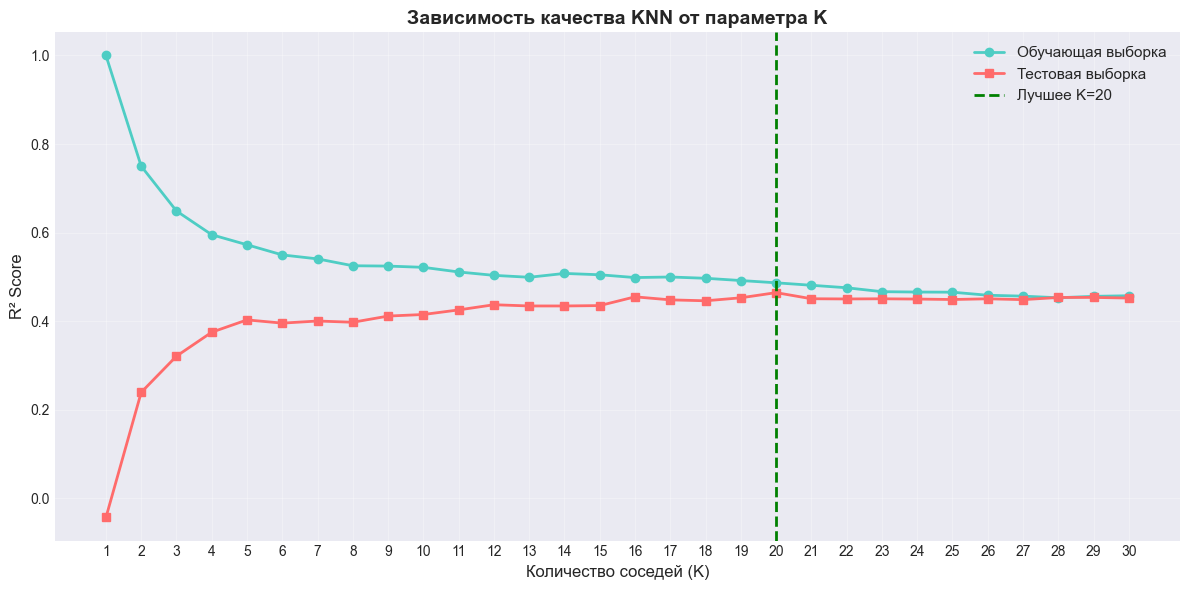

🎯 Оптимальное значение K: 20
   R² Score на тестовой выборке: 0.4646

💡 Наблюдения:
   - При малых K модель переобучается (большой разрыв между train и test)
   - При больших K модель становится слишком простой
   - Оптимальное K = 20 дает лучший баланс


In [19]:
# Тестируем разные значения K
k_values = range(1, 31)
train_scores = []
test_scores = []

for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    
    train_scores.append(knn_model.score(X_train, y_train))
    test_scores.append(knn_model.score(X_test, y_test))

# Находим лучшее K
best_k = k_values[np.argmax(test_scores)]
best_score = max(test_scores)

# Визуализация
plt.figure(figsize=(12, 6))
plt.plot(k_values, train_scores, marker='o', label='Обучающая выборка', linewidth=2, color='#4ECDC4')
plt.plot(k_values, test_scores, marker='s', label='Тестовая выборка', linewidth=2, color='#FF6B6B')
plt.axvline(best_k, color='green', linestyle='--', linewidth=2, label=f'Лучшее K={best_k}')
plt.xlabel('Количество соседей (K)', fontsize=12)
plt.ylabel('R² Score', fontsize=12)
plt.title('Зависимость качества KNN от параметра K', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(k_values)
plt.tight_layout()
plt.show()

print(f"🎯 Оптимальное значение K: {best_k}")
print(f"   R² Score на тестовой выборке: {best_score:.4f}")
print("\n💡 Наблюдения:")
print("   - При малых K модель переобучается (большой разрыв между train и test)")
print("   - При больших K модель становится слишком простой")
print(f"   - Оптимальное K = {best_k} дает лучший баланс")


## 8. Выводы

### Что мы узнали:

1. **Регрессия** - это задача предсказания непрерывного числового значения
2. **Линейная регрессия** - простой и эффективный метод, основанный на предположении о линейной зависимости
3. **KNN регрессия** - непараметрический метод, который может улавливать нелинейные зависимости
4. Метод **наименьших квадратов** минимизирует сумму квадратов ошибок
5. **Градиентный спуск** - итеративный алгоритм поиска оптимальных весов
6. Для оценки качества регрессии используются метрики: MSE, RMSE, MAE, R²
7. Выбор гиперпараметров (например, K в KNN) важен для качества модели

### Сравнение методов:

| Характеристика | Линейная регрессия | KNN регрессия |
|----------------|-------------------|---------------|
| **Интерпретируемость** | ✅ Высокая (видны коэффициенты) | ❌ Низкая (черный ящик) |
| **Скорость обучения** | ✅ Очень быстро | ✅ Мгновенно (запоминает данные) |
| **Скорость предсказания** | ✅ Очень быстро | ⚠️ Медленно (ищет соседей) |
| **Нелинейные зависимости** | ❌ Не улавливает | ✅ Улавливает |
| **Чувствительность к выбросам** | ⚠️ Высокая | ⚠️ Средняя |
| **Требования к памяти** | ✅ Малые | ❌ Хранит все данные |
| **Переобучение** | ⚠️ При многих признаках | ⚠️ При малых K |

### 🎯 Задания для самостоятельной работы:

1. Попробуйте обучить модель только на одном признаке (например, bmi). Сравните Linear Regression и KNN.
2. Какой признак самый важный для предсказания? Проверьте, совпадает ли это с корреляцией.
3. Постройте линейную регрессию для одного признака вручную, используя формулы из раздела 5.
4. Поэкспериментируйте с разными значениями K в KNN. Как меняется качество?
5. Попробуйте стандартизировать признаки (StandardScaler) перед KNN. Улучшится ли результат?

---

**Поздравляем! Вы познакомились с двумя базовыми методами регрессии! 🎓**

### 📚 Полезные термины:

- **Регрессия** - предсказание непрерывного значения
- **Признак (feature)** - входная переменная модели
- **Целевая переменная (target)** - то, что мы предсказываем
- **Коэффициент/вес (weight)** - параметр модели, показывающий влияние признака
- **MSE** - средняя квадратичная ошибка
- **R²** - доля объясненной дисперсии (насколько хорошо модель описывает данные)
- **Градиентный спуск** - алгоритм оптимизации для поиска минимума функции ошибки
- **K-ближайших соседей** - метод, основанный на поиске похожих объектов
